# Data Pre-processing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('flights.csv')
# the longitude should be negative, so it can be located in Canada
df['longitude'] *= -1
df

,id,date,airport_code,airport_name,airport_province,location,region,latitude,longitude,incident_type,...,aircraft_type,aircraft_model,aircraft_make,organization,operator_type,operation_type,destination_airport_code,destination_airport_name,departure_airport_code,departure_airport_name
0,156615,2022-12-10 14:06:00,YUL,Pierre Elliott Trudeau Intl,QUEBEC,Montreal,QUEBEC,45.470556,-73.740833,SMOKE OR FIRE (iii),...,AEROPLANE,737-200,BOEING,AIR INUIT,COMMERCIAL,AIR TRANSPORT,YPX,PUVIRNITUQ,YUL,Pierre Elliott Trudeau Intl
1,156604,2022-11-07 19:20:00,YGP,Gaspé (Michel-Pouliot),QUEBEC,GASPÉ,QUEBEC,48.775278,-64.479722,EMERGENCY/PRIORITY (xi),...,AEROPLANE,BA 32-12,BRITISH AEROSPACE,PASCAN AVIATION,COMMERCIAL,AIR TRANSPORT,YGR,ÎLES-DE-LA-MADELEINE,YGP,Gaspé (Michel-Pouliot)
2,156603,2022-11-07 18:51:00,YMT,CHIBOUGAMAU/CHAPAIS,QUEBEC,CHIBOUGAMAU,QUEBEC,49.771944,-74.528056,EMERGENCY/PRIORITY (xi),...,AEROPLANE,A100,BEECH,PROPAIR,COMMERCIAL,AIR TRANSPORT,YGL,LA GRANDE RIVIÈRE,YVP,KUUJJUAQ
3,156599,2022-12-04 19:15:00,SU3,St-Hyacinthe,QUEBEC,St-Hyacinthe,QUEBEC,45.606667,-73.015000,ENGINE (i),...,AEROPLANE,DA42,DIAMOND,CARGAIR - CARGAIR,COMMERCIAL,TRAINING,YHU,St-Hubert,YSC,SHERBROOKE
4,156593,2022-12-04 12:20:00,NF4,(Lindsay),ONTARIO,Kawartha Lakes,ONTARIO,44.364722,-78.783889,PILOT ERROR / WEATHER / MECHANICAL,...,AEROPLANE,172I,CESSNA,DURHAM FLIGHT CENTRE,PRIVATE,PLEASURE/TRAVEL,NF4,(Lindsay),YOO,Oshawa Executive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10150,92840,1998-03-03 08:00:00,YZU,WHITECOURT,ALBERTA,WHITECOURT,WESTERN,54.233333,-116.300000,RUNWAY EXCURSION (v),...,AEROPLANE,550,CESSNA,SUNWEST INTERNATIONAL AVIATION SERVICES,COMMERCIAL,AIR TRANSPORT,YZU,WHITECOURT,YYC,Calgary Intl
10151,92834,1998-03-10 06:04:00,YUL,Pierre Elliott Trudeau Intl,QUEBEC,Montreal,QUEBEC,45.766667,-74.233333,ENGINE (i),...,AEROPLANE,550,CESSNA,EXECAIRE (DORVAL),COMMERCIAL,BUSINESS,YUL,Pierre Elliott Trudeau Intl,YUL,Pierre Elliott Trudeau Intl
10152,92833,1998-02-28 12:00:00,YXH,MEDICINE HAT,ALBERTA,MEDICINE HAT,WESTERN,50.016667,-110.450000,PILOT ERROR / WEATHER / MECHANICAL,...,BASIC ULTRALIGHT,SKYE RYDER,SIX-CHUTER,PERSONAL CARRIER / NON-ORGANIZATION,PRIVATE,PLEASURE/TRAVEL,YXH,MEDICINE HAT,YXH,MEDICINE HAT
10153,92827,1998-02-24 18:50:00,YEG,Edmonton Intl,ALBERTA,Edmonton,WESTERN,53.500000,-113.950000,EMERGENCY/PRIORITY (xi),...,AEROPLANE,CL-600-2A12 (CHALLENGER 601),CANADAIR,AIR CANADA,COMMERCIAL,AIR TRANSPORT,YEG,Edmonton Intl,YYC,Calgary Intl


# Analyze what models need to pay attention for near 10 years (Has the notable incidents number)?

In [3]:

df['date'] = pd.to_datetime(df['date'])

# filter out the rows where the data is after 2011-12-31 23:59:59
df_in10Years = df[df['date'] > '2011-12-31 23:59:59']
df_in10Years.date.min()
list_model =  df_in10Years['aircraft_model'].drop_duplicates()
print(list_model.shape[0])

704


Since there are more than 700 models, we can not draw all of them for visualization. We need to drop some insignificant numbers. 

In [4]:
model_counts = df_in10Years['aircraft_model'].value_counts()
model_counts = model_counts.reset_index()
model_counts.columns = ['aircraft_model', 'count']
model_counts = model_counts[model_counts['aircraft_model'] != 'UNKNOWN']
model_counts = model_counts.iloc[:10]

model_counts

,aircraft_model,count
0,DHC-8-400,445
1,DHC-8-300,235
2,DHC-8-100,187
4,1900D,142
5,A320-200,141
6,737-700,101
7,737-200,81
8,B200,80
9,737-800,75
10,EMB-190,65


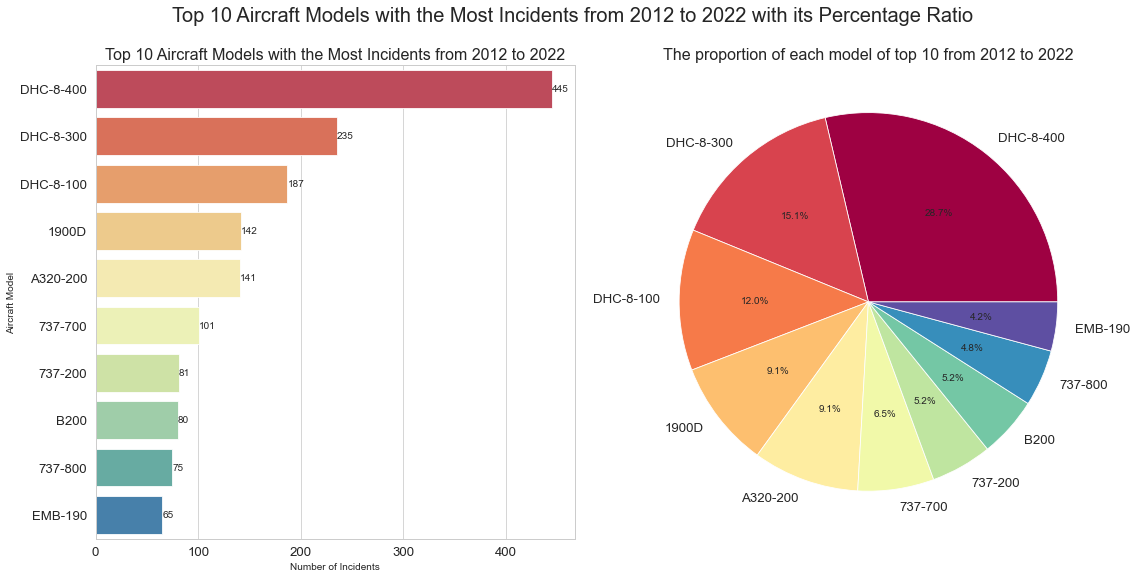

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style and context for Seaborn
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5)

model_counts = df_in10Years['aircraft_model'].value_counts()
model_counts = model_counts.reset_index()
model_counts.columns = ['aircraft_model', 'count']
model_counts = model_counts[model_counts['aircraft_model'] != 'UNKNOWN']
model_counts = model_counts.iloc[:10]

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# only keep the top 10 models
model_counts = model_counts.iloc[:10]
sns.barplot(x='count', y='aircraft_model', data=model_counts, ax=axs[0], palette="Spectral")
axs[0].set_title('Top 10 Aircraft Models with the Most Incidents from 2012 to 2022', fontsize=16)
axs[0].set_xlabel('Number of Incidents')
axs[0].set_ylabel('Aircraft Model')


axs[0].bar_label(axs[0].containers[0])

# Use the same colormap for the pie chart
cmap = plt.get_cmap("Spectral")
colors = cmap(np.linspace(0, 1, len(model_counts)))

axs[1].pie(model_counts['count'], labels=model_counts['aircraft_model'], autopct='%1.1f%%', colors=colors)
axs[1].set_title('The proportion of each model of top 10 from 2012 to 2022', fontsize=16)


fig.suptitle('Top 10 Aircraft Models with the Most Incidents from 2012 to 2022 with its Percentage Ratio', fontsize=20, y=1)
plt.tight_layout()
plt.show()


/var/folders/z_/_svpfmcs5fl0mkczt0127k680000gn/T/ipykernel_4760/477116401.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_in10Years['year'] = df['date'].dt.year


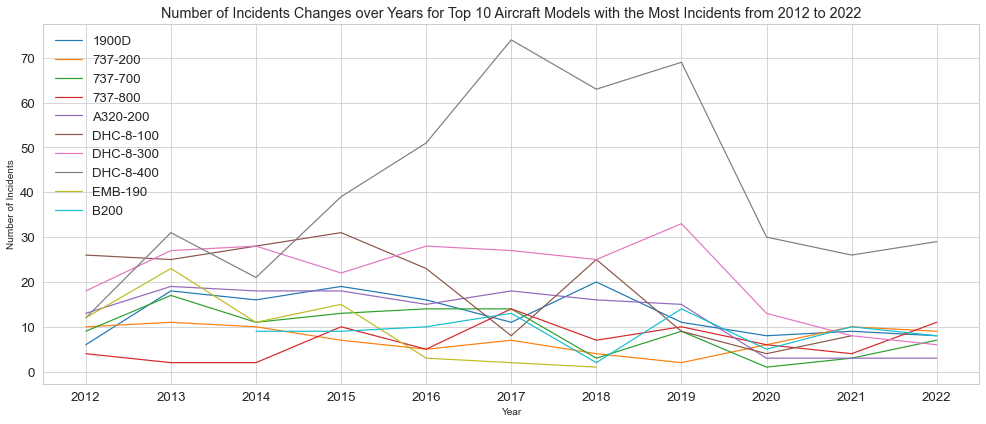

In [6]:
df_in10Years['year'] = df['date'].dt.year
# only keep the model, year, and count columns
df_in10Years_model = df_in10Years[['aircraft_model', 'year']]
grouped_df = df_in10Years_model.groupby(['year', 'aircraft_model']).size().reset_index(name='count')
grouped_df = grouped_df[grouped_df['aircraft_model'].isin(model_counts['aircraft_model'])].reset_index(drop=True)

grouped_df_1900D = grouped_df.loc[grouped_df['aircraft_model'] == '1900D']
grouped_df_727_200 = grouped_df.loc[grouped_df['aircraft_model'] == '737-200']
grouped_df_737_700 = grouped_df.loc[grouped_df['aircraft_model'] == '737-700']
grouped_df_737_800 = grouped_df.loc[grouped_df['aircraft_model'] == '737-800']
grouped_df_A320_200 = grouped_df.loc[grouped_df['aircraft_model'] == 'A320-200']
grouped_df_DHC_8_100 = grouped_df.loc[grouped_df['aircraft_model'] == 'DHC-8-100']
grouped_df_DHC_8_300 = grouped_df.loc[grouped_df['aircraft_model'] == 'DHC-8-300']
grouped_df_DHC_8_400 = grouped_df.loc[grouped_df['aircraft_model'] == 'DHC-8-400']
grouped_df_EMB_190 = grouped_df.loc[grouped_df['aircraft_model'] == 'EMB-190']
grouped_df_B200 = grouped_df.loc[grouped_df['aircraft_model'] == 'B200']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(grouped_df_1900D['year'], grouped_df_1900D['count'], label='1900D')
ax.plot(grouped_df_727_200['year'], grouped_df_727_200['count'], label='737-200')
ax.plot(grouped_df_737_700['year'], grouped_df_737_700['count'], label='737-700')
ax.plot(grouped_df_737_800['year'], grouped_df_737_800['count'], label='737-800')
ax.plot(grouped_df_A320_200['year'], grouped_df_A320_200['count'], label='A320-200')
ax.plot(grouped_df_DHC_8_100['year'], grouped_df_DHC_8_100['count'], label='DHC-8-100')
ax.plot(grouped_df_DHC_8_300['year'], grouped_df_DHC_8_300['count'], label='DHC-8-300')
ax.plot(grouped_df_DHC_8_400['year'], grouped_df_DHC_8_400['count'], label='DHC-8-400')
ax.plot(grouped_df_EMB_190['year'], grouped_df_EMB_190['count'], label='EMB-190')
ax.plot(grouped_df_B200['year'], grouped_df_B200['count'], label='B200')

ax.set_xlabel('Year')
ax.set_ylabel('Number of Incidents')
ax.set_title('Number of Incidents Changes over Years for Top 10 Aircraft Models with the Most Incidents from 2012 to 2022')
ax.set_xticks(np.arange(2012, 2023, 1))
ax.legend(loc='upper left', framealpha=0)


# change the size of the figure
fig.set_size_inches(13, 5)

In [7]:
dhc8_400_counts = df_in10Years[df_in10Years['aircraft_model'] == 'DHC-8-400']

# return year is 2020, 2021, or 2022
dhc8_400_counts = dhc8_400_counts[dhc8_400_counts['year'].isin([2020, 2021, 2022])]

dhc8_400_counts = dhc8_400_counts['incident_type'].value_counts()

# create DataFrame from the value counts
df_dhc8_400 = pd.DataFrame({'incident_type': dhc8_400_counts.index, 'count': dhc8_400_counts.values})

df_dhc8_400

,incident_type,count
0,EMERGENCY/PRIORITY (xi),43
1,DIFFICULT TO CONTROL (iv),15
2,SMOKE OR FIRE (iii),10
3,UNABLE TO PERFORM (vi),7
4,ENGINE (i),3
5,RISK OF COLLISION (x),2
6,DEPRESSURIZATION (vii),2
7,INCORRECT / CONTAMINATED FUEL(ix),1
8,COLLISION (x),1
9,FUEL SHORTAGE (viii),1


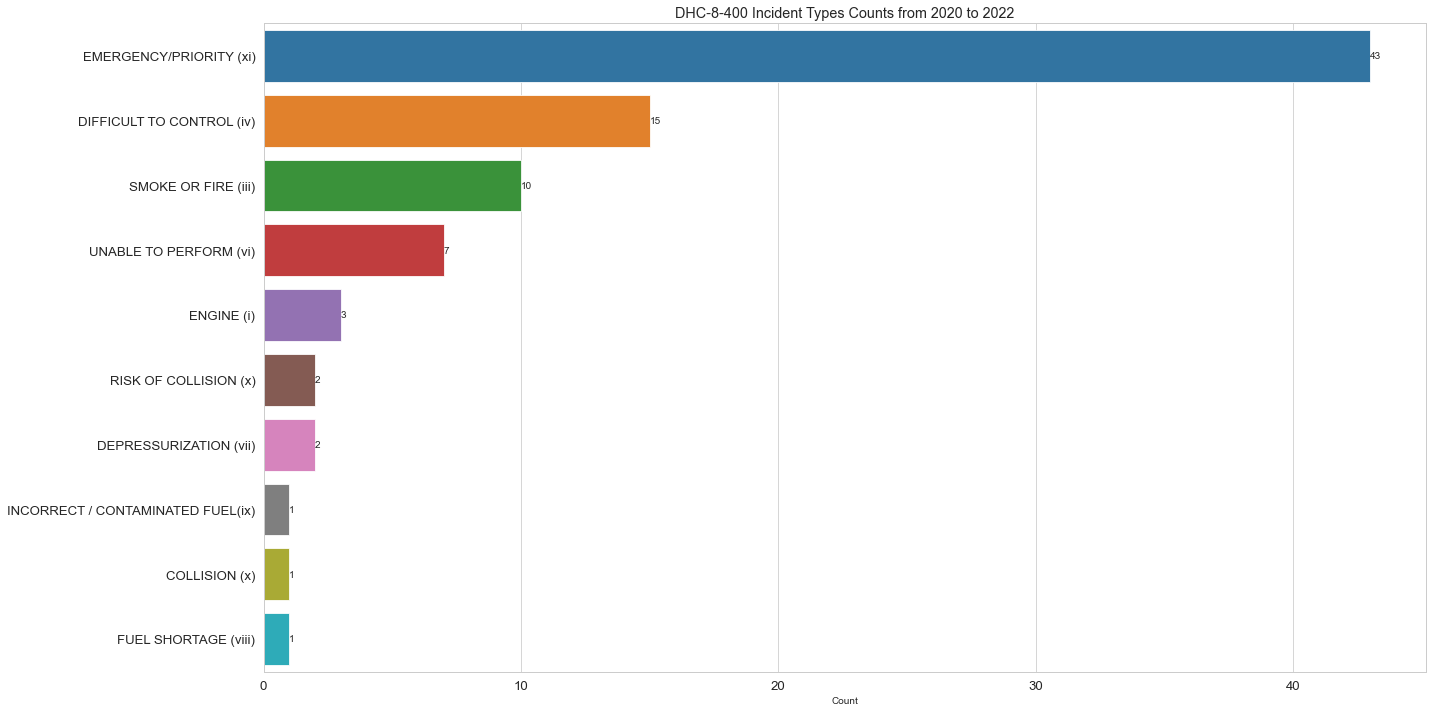

In [8]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
sns.barplot(x='count', y='incident_type', data=df_dhc8_400, ax=axs, palette="tab10")
axs.set_title('DHC-8-400 Incident Types Counts from 2020 to 2022')
axs.set_xlabel('Count')
axs.set_ylabel('')
axs.bar_label(axs.containers[0])

plt.tight_layout()
plt.show()